# Bayesian Methods 
In this section we are going to start looking at Bayesian methods, and some motivation for why bayesian methods are beneficial. First we will discuss disadvantages of traditional A/B testing. 

We have the following extreme example: 
> A drug you are testing is working well-can you stop the test and improve quality of life of all participants? Frequentist statistics says "no"

This is because it is bad to stop early when doing frequentist statistics, since in increases the chances that you find a false positive. Remember: the p-value can pass below/above the threshold over time 

# Multi-Armed Bandit
> Imagine you are at a casino playing slots (hence the term "arm"). The slot machines are bandits because they are taking your money. Not all the slot machines are equal, 
* 1 pays out 30% of the time
* 1 pays out 20% of the time
* and 1 pays out 10% of the time

This is the same problem as click-through rate or conversion rate! You would just have a click = getting a prize! So you would set up an AB test, run the experiment, and by the end you would know if any one arm was significantly better than the others. E.g. run A/B test for a specific number of N trials, then calculate the p-value. 

## What would you do in real life?
* say 1 arm gives you a prize 3 out of 3 times, and the other arm gives you a prize 0 out of 3 times
* you intuitively will want to play the arm that payed out 3 times! 
* Why? You **ADAPT** 
* 3 plays is probably not enough to gain statistical significance, but you still feel compelled to believe the 1st arm is better

## Reinforcement Learning
* This is the same problem we face in reinforcement learning, where we are trying to teach a machine to play a game
* It models rewards it gets based on actions it takes
* The problem is that this process is stochastic, and your model of the rewards is only an estimate (it is not feasible to try every possible action, in every possible state)
* Early on: few actions taken, unsure about most rewards 
* can't "choose the action that leads to the best reward", because currently knowledge about rewards is minimal
* only after collecting a lot of data will the estimate be accurate


# Explore vs. Exploit 
This problem has a name and it is called the explore-exploit dilemma. The question is:
> If I have gotten 3/3 on bandit 1, and 0/3 from bandit 2, should I:
* **Exploit** bandit 1 more?
* **Explore** at random to gather more data? 

We will look at several solutions to this problem! All will be adaptive, but not all will be bayesian. We will show the bayesian method last. 

# Epsilon-Greedy Solution 
One method of solving the explore-exploit dilemma is called the epsilon-greedy algorithm (and it is intuitive). It just so happens that this algorithm is also used in reinforcement learning. Here is how it works:
> Say you have some software that is serving 2 advertisements (A & B), you will *not* run a full A/B test by blindly serving ad A and ad B an equal # of times. Instead you will adapt to the data you have collected. If ad A is performing better, it will be shown more often. 

Note: even with this adaptive system, you can still do traditional A/B test after collecting data. Remember the contingency table for the chi-square test doesn't require both samples to be the same size. The thing changing here is not the test, but the machine that serves the ads. It will adapt based on the performance of each ad. 

## How does it work?
* simpler than it sounds! 
* We start by choosing a small number epsilon ($\epsilon$) between 0 and 1
* That will be the probability of exploration 
* some psuedo code may look like:

In [63]:
# epsilon = 0.1 
# while True:
#     r = rand()
#     if r < epsilon:
#         # explore
#         # show random advertisement
#     else:
#         # exploit
#         # show best advertisement (as determined by #clicks/#impressions)

## Analyis of Epsilon-Greedy
We can clearly see that that was pretty simple. So lets analyze further...
* One problem is that this algorithm does the same thing *forever*
* even when ad A is statistically significantly better than B, it will still sometimes choose B
* Suppose test has converged, A is better than B, how much reward will we get?
* suppose:
### $$reward(click) = 1 \;,\; reward(noclick) =0$$
* After N impressions:
### $$reward = N(1-\frac{\epsilon}{2})$$
* In other words, for $\epsilon = 0.1$, we get 0.95N instead of N
* However, this is still better than traditional A/B testing with no adaptation 


---
# UCB1 
Can we improve upon the Epsilon-Greedy Algorithm?
* Recall our previous discussion about confidence intervals: 
* define upper and lower limit to represent where we believe true CTR is 
* We'll now look at a similar idea, but we are not going to use the confidence bound we discussed before

## Confidence Intervals
* We are going to use a "tighter" bound: the **Chernoff-Hoeffding** bound
* It says, for some: 
### $$\epsilon > 0$$
* then it is true:
### $$P(\hat{\mu}>\mu+\epsilon \leq exp(-2\epsilon^2N))$$
* The opposite side is also true (symmetry)
### $$P(\hat{\mu}<\mu-\epsilon \leq exp(-2\epsilon^2N))$$
* this is different from our old confidence intervals - those gave us an equality (Specific numbers)
* in other words, the old confidence interval gave us the true probability that the true parameter lies within some interval is 95%. 
* E.g. $P(\mu\;in\;interval) = 95%$
* This new equation however says:
### $$P(\mu\;in\;interval) > f(N)$$
* To get the greater than sign, we just need to combine and rearange the above probabilities:

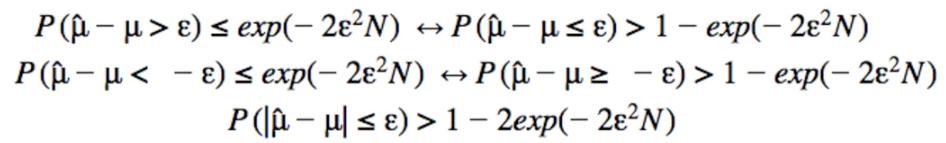

## Upper Confidence Bound 
* In our case, we are only interested in the upper bound, because we want to get the highest reward possible
* How does this help us? 
* Intuitively, if we have a "tighter" upper bound, we can be more confident about the max. possible win rate of any bandit
* we are going to skip some math, but essentially, for any arm j, we "choose" the epsilon:

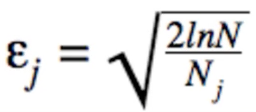

* Here: 
    * N = the total number of games we have played overall
    * $N_j$ = the total times we have played arm j
    
## UCB1 Algorithm 

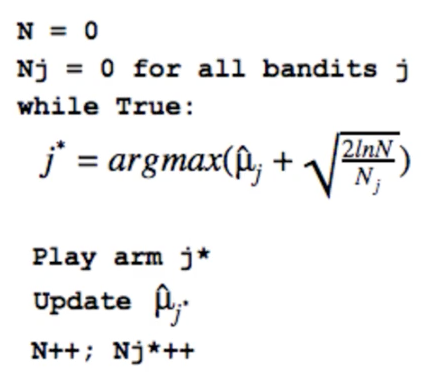

* here we can see that in the while loop we choose the bandit with the highest upper bound. We play that arm, and then we update the estimated mean for that arm. 
* You may wonder, how does this algorithm help us explore and exploit? 
* Lets look at each of the terms separately:

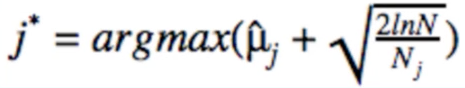

* The first term: is the estimated mean (the Click through rate estimate)
    * if that is high, then we want to exploit more often
* the second term: depends on N and Nj
    * if N is high, Nj is low, we are not so confident about the CTRj, so explore this more
* consider asymptotic behavior of ln(N)/N
    * as N approaches infinity, ln(N)/N approaches 0, and the second term will go to 0, and we will only be using the estimated means when N is large! So we use only the true CTR in the limit!
    
## UCB1 Expected loss
* coding-wise, this is no more complicated than espilon-greedy, but what is our expected loss?
* It "can be" (complicated math we will skip) shown that the loss is proportional to ln(N)
* compare to epsilon-greedy: the loss is proportional to N
* in the long run, UCB1 will perform much better than epsilon-greedy
* code is just as easy to write, even if the theory is more complex

---
# Conjugate Priors
Lets now build on our mathematical tools, in preparation for bayesian A/B testing! 

## Frequentist Paradigm
* In an earlier section, we talked about the bayesian paradigm
* we said that when we use the frequentist paradigm, we measure things like the mean and CTR (click-through rate) with point estimates
* E.g. sum(X)/N
* The problem was it didn't take into account how accurate those estimates were
* Our solution was to use the central limit theorem to show that the confidence interval was approximately gaussian, and from there we could get an upper and lower bound on the 95% confidence interval 
* so the frequentist paradigm:
    * calculates the likelihood (probability of your data, given the parameter)
        * e.g. probability (how likely was it) you observed the data you did, given a gaussian distribution with mean $\mu=4$
    * maximizes the likelihood with respect to the parameter in question 
        * e.g. find mean $\mu$ (and associated gaussian distribution) that maximizes the probability you observed the data you did
    * we end up with the maximum likelihood estimate for that parameter 
    * the equation below is general but think of the case: likelihood of the data we observed (X) maximized by a  given a value of the mean ($\theta=\mu$)
    
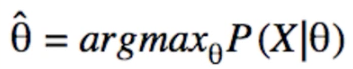

## Bayesian Paradigm
* In Bayesian Statistics, we treat theta as a random variable too, so it has its own distribution (not a point estimate like with frequentist paradigm!)
* The shape of that distribution will tell us how confident we are for any value of that parameter 
* We apply bayes rule to help us with this: 

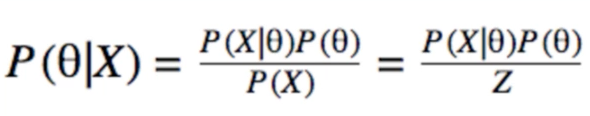

* Here Z is a "normalizing constant"
* ### $P(X|\theta)$ = likelihood (how likely is this data given current $\theta$
* ### $P(\theta)$ = prior (old beliefs about $\theta$)
* ### $P(\theta|X)$ = posterior (new belief about $\theta$ after seeing data  

At this point you may be thinking "that's easy! Just multiplication and division!". Not so fast. These are all probability distributions. In particular, remember that P(X) is the integral over $P(X|\theta)P(\theta)d\theta$. Generally speaking, this integral is either hard or impossible to solve. One solution to that is to use sampling methods like MCMC, but we are not going to cover that since we are going to arrive at a much more elegant solution. 

## Conjugate Priors
The answer to our problem is conjugate priors! Conjugate priors gives us elegant solutions for $P(\theta|X)$! 
* It turns out that for specific likelihood distributions **$P(X|\theta)$** and specific prior distributions **$P(\theta)$**, when you solve bayes equation, the posterior distribution **$P(\theta|X)$** will have the same type of distribution as the prior! 
* Lets do an example to illustrate this

## Conjugate Prior Example
* We know the likelihood for click-through rate is Bernoulli:

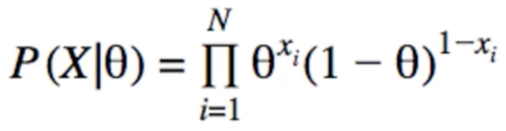

* We also know that $\theta$ must be between 0 and 1, because it's the probability of a click
* What probability distributions go between 0 and 1?? (browse your reference book!)
* You would arive at the beta distribution! 

### <center> Beta PDF Plot (x-axis = $\theta$, y-axis = probability) </center>
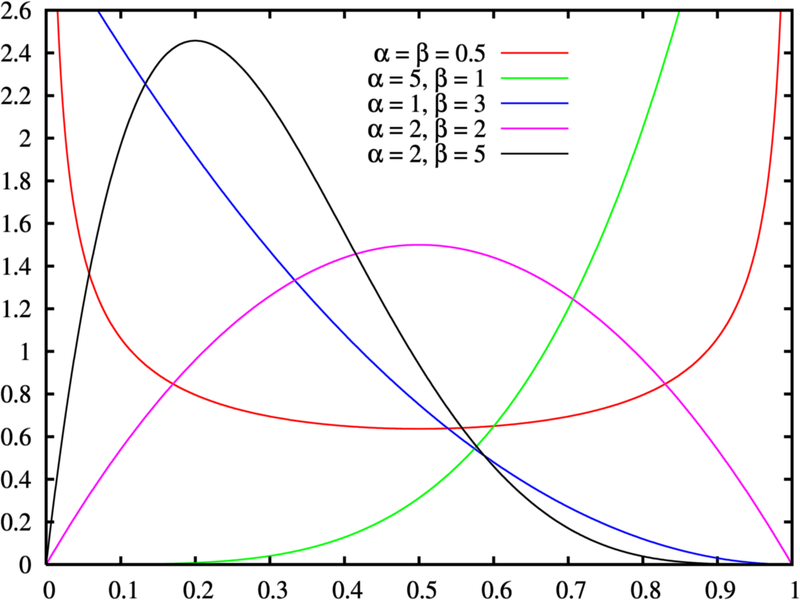

### <center> Beta Distribution PDF </center>
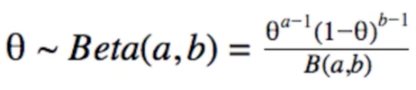

Where the **Beta Function can be defined in terms of the gamma function:**

### <center> Beta Function </center>
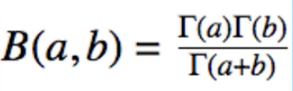

### <center> Gamma Function </center>
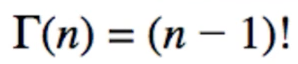

* Note: Gamma is a generalized factorial for real numbers 
* Now lets combine the likelihood and the prior using bayes rule, and see if we can solve for the posterior! 
* We use the proportionality symbol because we are not considering the normalization constant (note: first term below is likelihood, second is prior)

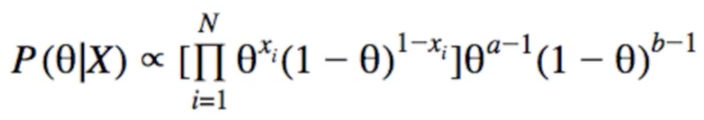

* We can combine like terms, so that everything that has $\theta$ on the base goes together, and everything that has $1-\theta$ on the base goes together 

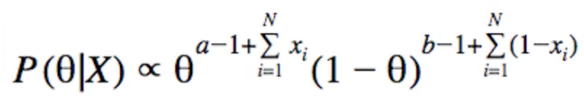

* We can see that this has the same shape as the beta distribution! Remember: Normalization constant does not matter because it doesn't depend on theta! 
* In particular, we can see that: 

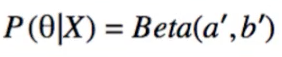

* The above is also a Beta Distribution!
* where a' and b' can be defined as all of the X's we have collected:

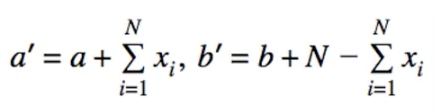

* or they can be defined in terms of our click through rate problem:

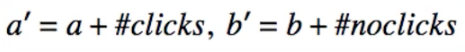

## Beta Mean
* One interesting fact: the mean is equal to a/(a+b)
* This is exactly what the MLE of the click through rate would have been 

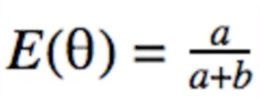

* However this solution is much more elegant, because this distribution does not require an approximation. 

## Beta Variance
* The bigger a and b get, the smaller the variance becomes
* same behavior as approximated confidence interval
* variance gets smaller as we collect more data!

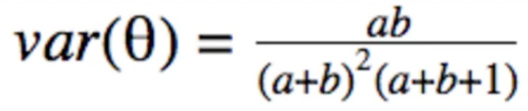


## Prior
* One question you may have is how do we choose the original a and b (not a' and b')? 
* Well, it turns out if you set a=1 and b=1, the beta distribution is equal to the uniform distribution (0,1)

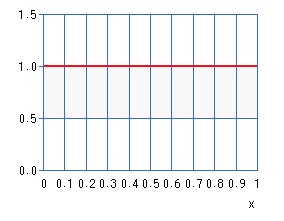

* This makes sense because if we don't know anything, all click-through rates are equally probable
* We call this a non-informative prior
* **Important**: As we collect a large amount of data, the influence of the prior parameters becomes negligably small!

## Summary
> 
* We just recaped but it means to be frequentist and what it means to be bayesian
* When performing bayesian statistics, we now treat our parameter as a random variable (instead of a point estimate) and give it a probability distribtution
* We identified a set of probability distributions (Bernoulli + Beta), such that when you combine them using bayes rule, the posterior and prior are of the same type of probability distribution
* We call these **conjugate priors** (Note: A conjugate prior is an algebraic convenience, giving a closed-form expression for the posterior; otherwise numerical integration may be necessary)
* Wikipedia has an article that lists all the conjugate likelihood-priors pairs: https://en.wikipedia.org/wiki/Conjugate_prior
* Lastly, we showed that beta has the same mean as maximum likelihood of Bernoulli, and variance shrinks as more N increases, just like frequentist confidence interval
  

---
# Bayesian A/B Testing
We are finally going to take a look at the Bayesian A/B testing algorithm! Previously we:
* looked at how to get a probability distribution of click through rates, given the data we have seen
* Now the question is:
    1. how can we use these distributions to solve the the explore-exploit dilemma?
    2. Do it better than epsilon-greedy and UCB1?
    
## Sampling
The answer to the above question is **sampling**! 
* Whenever you generate random numbers, you should ask "what distribution am I sampling from"?
* Typically, most programming languages give you a `rand()` function that provides you with a uniformly distributed # between 0 and 1
* Numpy also gives you a randn() function, which lets you sample from a Gaussian, with a mean=0 and a variance=1
* Scipy allows us to sample from all of the distributions it contains-Beta is included!
* How does sampling from the beta distribution help us? Lets explore a few scenarios to see

## Scenario 1
* we've already spent a lot of time exploring, so we have bery sharp distributions (high confidence) for our click through rates

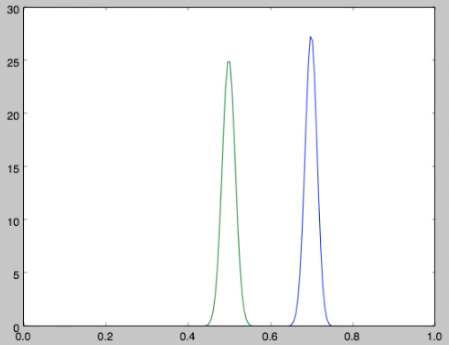

* If we sample from these 2 distributions, we expect with very high probability that the one with the higher CTR will give us a higher random number 
* In terms of our bayesian bandit problem: we should choose to play the bandit that gives us the largest random number 
* Note: it is still "possible" for the worse bandit to give use a higher random number, but this becomes increasingly unlikely as distributions get sharper! 

## Scenario 2
* Now lets look at another scenario 

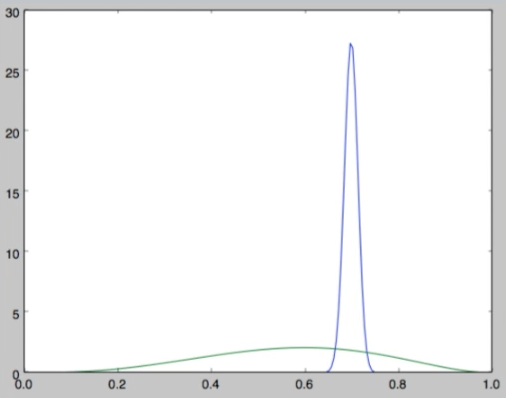

* Here one bandit has been exploited a lot, so we are very sure of its click through rate
* But we have not collected so much data for the other one (fat variance)
* sampling and choosing the maximum will help us here too! 
* In this scenario, the bandit with the fatter variance has a much greater chance of giving us a random number that is larger 
* **We can see that it is the distributions themselves that tell us how much to explore and exploit!!!**
* More data gives us less variance, and less exploration, while less data means greater variance and greater exploration!

## Scenario 2 - from another perspective
* Notice that the sharp CTR is already "pretty good"
* If we split the fatter distribution along that higher CTR:

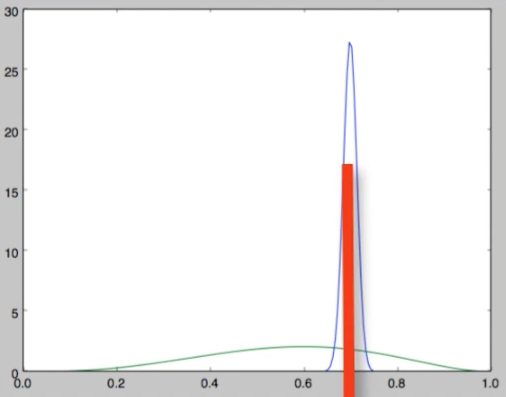

* we can see that it is more probable to choose a lower number:

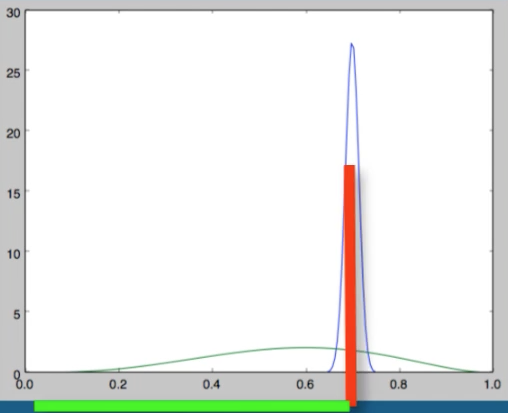

* than it is to choose a higher number:

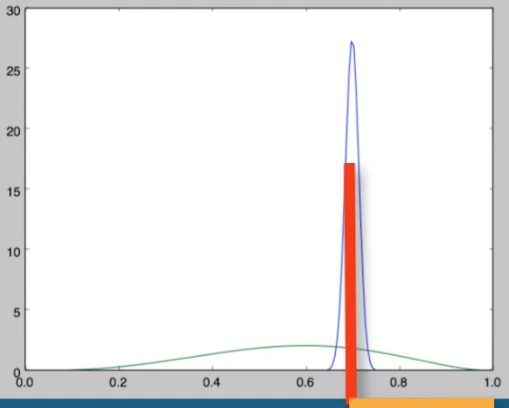

* what does that mean? 
* it means that the sharp ctr is already pretty good, so we will spend more time exploiting that, and less time exploring!

## Scenario 3

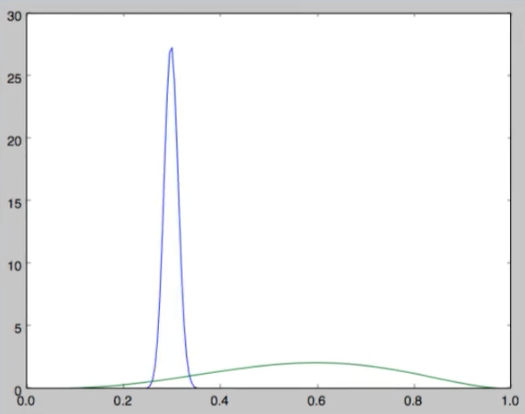

* Here we can see that the sharp CTR bandit is "pretty bad" 
* Now more probability weight of the fat variance bandit is to the right of it
* hence, we are more likely to explore the other bandit now 

## Thompson Sampling
* This method is also called **Thompson Sampling**
* Also used in context of reinforcement learning 

## Pseudocode
* Lets put this all together with some pseudocode!

In [64]:
# while True: 
#     # draw a random sample from all bandits current Beta(aj, bj)
#     j* = bandit that gives us maximum sample, aka choose the bandit that gives us the maximum sample
#     x = Play bandit j*, aka pull that bandits arm 
#     aj* = aj* + x, update bandits a
#     bj* = bj* + 1 - x, update bandits b

* Note this is independent of the number of bandits, which is something that we needed to correct for with the frequentist A/B test  

# Bayesian A/B Testing in Code 
* We are now going to code the bayesian AB test! 

## Start with our imports

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
%matplotlib inline

## Setup
We can play around with these numbers to see how our examples play out. 

In [66]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Define class `Bandit`
This class is going to act like a slot machine. 
> 
* Class: **`Bandit` **
* Probability of winning, **`p`**
* beta parameters **`a`** and **`b`**, set equal to **`1`**, which gives the uniform distribution 
* method **`pull`**: returns **`1`** or **`0`** (a win or a loss)
* method **`sample`**: samples from class instance current beta distribution
* method **`update`**: updates instance beta parameters, **`x`** is number of clicks

In [67]:
class Bandit: 
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        
    def pull(self): 
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1 - x 

## Define Function to plot each bandits PDF (a beta distribution)

In [68]:
def plot(bandits, trial):
    x = np.linspace(0,1,200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"real p: {b.p}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

## Define Function to run experiment

current samples:  [0.8192500751745107, 0.1465832067135744, 0.8200222717717197]


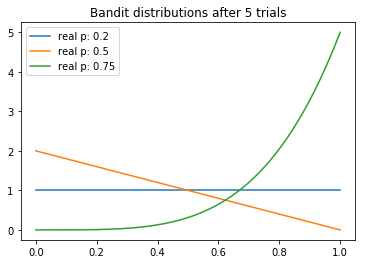

current samples:  [0.5710108189456533, 0.40549037747670785, 0.87144134425991]


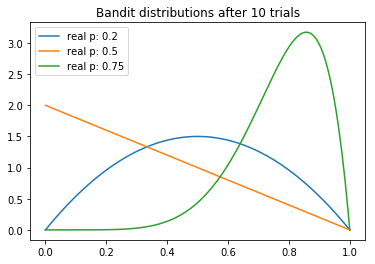

current samples:  [0.5802697327232577, 0.10249875045251142, 0.9375058564718883]


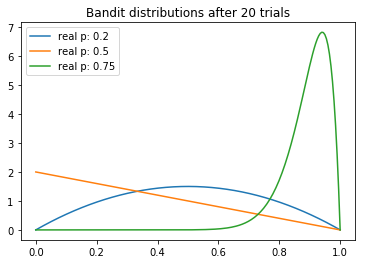

current samples:  [0.9576013204561419, 0.36939534264770774, 0.8533907137705543]


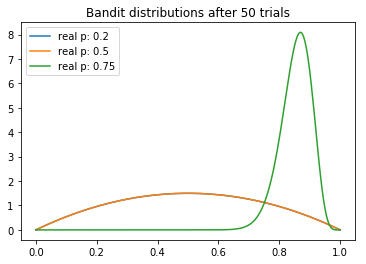

current samples:  [0.6452250886603551, 0.48634092832276826, 0.8094820266767715]


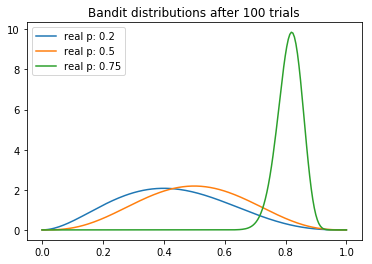

current samples:  [0.3008749641695666, 0.18076302701279834, 0.8032708901288191]


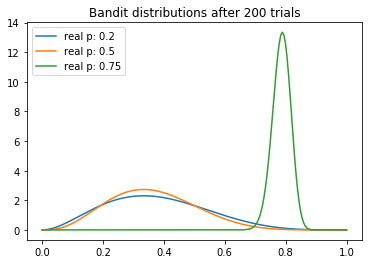

current samples:  [0.20633006999665754, 0.46526375069274234, 0.8178916944386683]


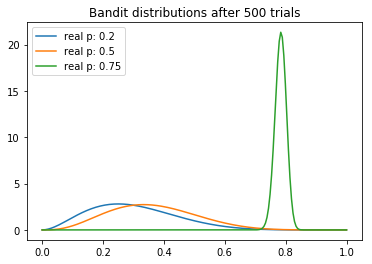

current samples:  [0.3490433839395324, 0.32758783798646374, 0.7532238120018429]


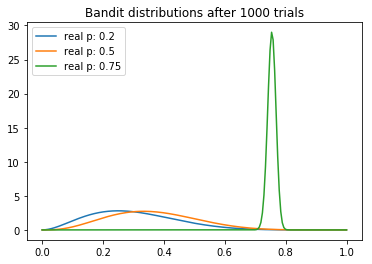

current samples:  [0.12405149191831966, 0.3244765049455743, 0.7702185002534184]


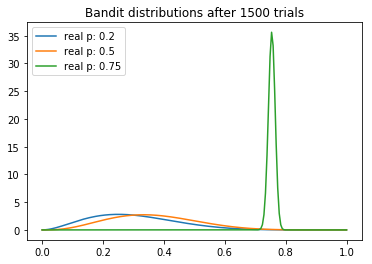

current samples:  [0.18124833048414346, 0.6023027678873115, 0.763864492910045]


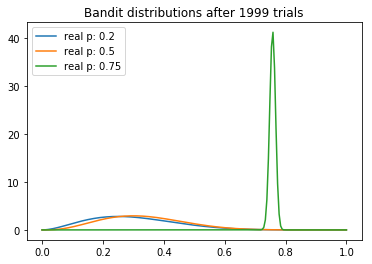

In [69]:
def experiment():
    # initializing array of bandits
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    # these are point where we will show a plot
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    
    # loop through each trial 
    for i in range(NUM_TRIALS):
        bestb = None
        maxsample = -1
        allsamples = []
        
        # loop through each bandit (could use argmax, would be much simpler)
        for b in bandits: 
            sample = b.sample()
            allsamples.append(sample)
            if sample > maxsample:
                maxsample = sample
                bestb = b
        if i in sample_points:
            print( "current samples: " , allsamples)
            plot(bandits, i)
        x = bestb.pull()
        bestb.update(x)

if __name__ == '__main__':
    experiment()

## Important to note
Some things worth noting in the problem above:
* What is so elegant about this solution is the fact that each bandits parameter, $p(success)$, is a distribution! 
* So when we perform thomspson sampling over a large number of iteration, we are able to slowly increase our confidence in the results 

## Process Summary
> 
* We began by creating a class that would serve as our casino slot bandits
* we initialized a number of trials, and the initial probabilities
* we create a function that would plot each bandits probability distribution
* created a function to run the experiment, that:
    * created an array of our instantiated bandits
    * defined the points where we wanted to plot the progress of the bandits pdfs
    * looped through each trial (2000)
    * for each trial, we then wanted to loop through the array of bandits (3 in our example)
    * when looping through the array of bandits, we would sample from each one (sampling from its pdf)
    * we would take whichever bandit gave us the highest sample for that iteration
    * we then would pull that bandits arm. If it was a successful pull, its a would be updated by 1, if unsuccessful its b would be updated by 1
    * because each bandits pdf is a beta distribution, and the beta distribution is based on a and b, the bandits distributions slowly update over the length of the experiment
    * this process was then repeated for all 2000 trials
    * In other words, as the experiment runs each bandit beta pdf parameters are continually updated, so by the end we are very confident in which one performed the most effectively! 
    * during the 2000 trials, plotting of the distributions was done at preselected points

--- 
# The Online Nature of A/B testing
Lets step back for a minute and consider how far we have come along!

## Bayesian Sampling
* We started with traditional A/B test with all sorts of approximations, awkwardly decide how many samples you need to collect with more approximations, and then run full experiment without any adaptation to results collected so far
* If you want to stop early, frequentist statistics says "you won't get a valid result"
* Now we have a way to create an adaptive system! Which when you think about it, it doesn't even really require any kind of test!
* We just start the system and let it run! And eventually it converges, so that you are doing the best possible thing given the data that you have collected
* there is no threshold at which the results become valid
* You just naturally converge to equilibrium 

## The Online Nature of Bayesian Methods
* One interesting aspect of the bayesian sampling method, is that your measurements become more accurate after every single sample you collect!
* Why is that? Well as we mentioned above, you can see that we don't just update a bandits a and b parameters after collecting all the data, we updated it after every time we pulled an arm! 
* In other words, the **posterior** we have now **becomes** the **prior** when we incorporate even more data 

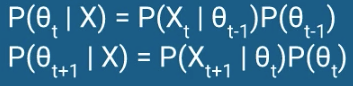

* Note: the reason that all we need to do to get an updated posterior is update a and b for that bandit (instead of all the math we saw earlier in bayes rule) is because of the derivation we went through earlier! We can see that the posterior is equal to the Beta pdf with updated a and be values!!!

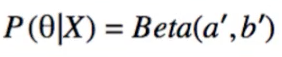
 
* compare this to a traditional machine learning model, where you fit all of your training data at the same time
* fit(Xtrain, Ytrain) all at once
* If we get more data in that case, we need to retrain from scratch
* With Beta, we just add a number to a and a number to b
* it automatically fine-tunes! 

## Online Learning
* This is an example of "online" learning
* The model will learn after every new sample
* There won't be any RAM issues because `a` and `b` take up constant space
* There won't be any speed issues either
* In a sense this is more similar to how humans and animals learn
* We take our most recent experience, and form some opinion about it
* Never do we take every experience we have ever had and try to reach some global optimum
* In fact we can't do that because our memory systems are imperfect
* There are a lot of satisfying results that stem from using the bayesian method! 

---
# Finding a Threshold without P-Values
Lets take a minute to go back to P-values and decide: is there a threshold that we can come up with for when we are doing Bayesian A/B testing?

## Thresholds
* Even though Bayesian Sampling is very efficient, it still uses up resources
* you would presumably have to store your values of `a` and `b` in a database somewhere
* And you would have to generate random numbers for all of your bandits, and so on 
* So if you are certain that one advertisement A is better than another B, why not just show that advertisement A statically? 

## P($\mu_1$ > $\mu_2$)
* remember, $\mu$ is the click through rate 
* also remember that $\mu_1$ and $\mu_2$ are both Beta-distributed
* How can we get P($\mu_1$ > $\mu_2$), aka the probability that $\mu_1$ is greater that $\mu_2$?
* Before we try and calculate this probabilty, lets first look at the definition of a p value again:
> **"The probability of obtaining a result equal to or 'more extreme' than what was actually observed, when the null hypothesis is true"**

* Isn't that confusing? It is very easy to phrase things the wrong way and make a statistician angry!
* You can't accept the null hypothesis, you can only not reject the null hypothesis 
* With definitions like that, it is easy to see why so many people love machine learning, when statistics never really got much attention (even though they are so similar)
* It is very easy for non technical people to misunderstand what p values mean
* A common misconnception is that: Say you get a p value of 1%, people may think that the probability that $p(\mu_1 \neq \mu_2) $= 99%
* Using the definition above, this is of course not the case! 
* Yet, intuitively this is the probability people want! It is simple, intuitive, and easy to interpret
* Luckily, because $\mu_1$ and $\mu_2$ boht have distributions, bayesian methods allow us to calculate it! 
* But how...?

## How to calculate P($\mu_1$ > $\mu_2$)
* Basic premise from first principles: 
* We want the probability that $\mu_1$ > $\mu_2$, which is the same as:
### $$P(\mu_1 > \mu_2) = P(\mu_1 - \mu_2 > 0) = P(X>0)$$
* and is equal to the area under the PDF of X from 0 to $\infty$
* We do not know the distribution that X has however
### $$PDF(X) = Beta1(X) * Beta2(-X)(convolution\;operator)$$
* So instead of doing that, we will take an alternative route
* we will look at the joint PDF of $\mu_1$ and $\mu_2$
### $$Joint\;PDF = p(\mu_1,\mu_2) = p(\mu_1)*p(\mu_2)$$
* and find the area under the curve where $\mu_2$ > $\mu_1$
### $$P(\mu_1 > \mu_2) = area\;under\;p(\mu_1,\mu_2)\;where\;\mu_2 > \mu_1$$
* Remember the joint pdf is just the multiplication of the two betas, because they are independent!

## P($\mu_1$ > $\mu_2$) Visualization
* in fact you can make a plot of the joint pdf as heatmap 
* So we just want the area of the upper triangle

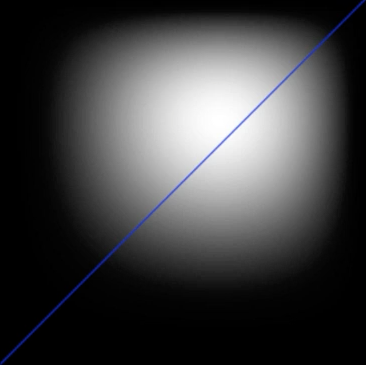

## P($\mu_1$ > $\mu_2$) Solution
Now the derivation is outside the scope of this course, but the end result is this closed form expression, which can easily be solved by a computer:

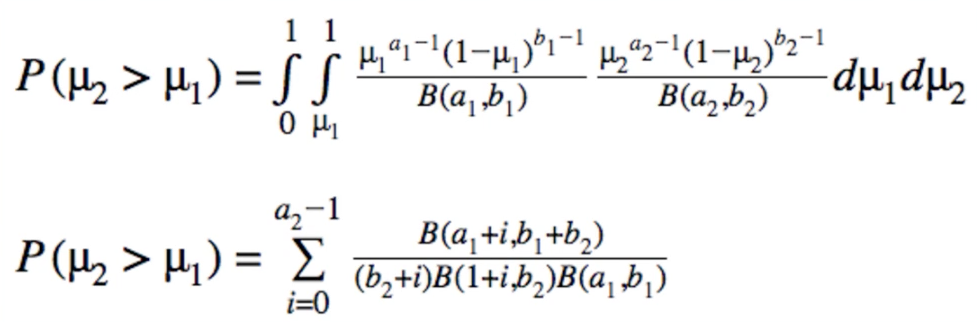

However, note the summation is of a2, so it is not necessarily fast to calculate.

## Another Option
* Another option to get a threshold is to define a loss function and then quit when the expected value of the loss falls below some threshold 
* Assuming that $\mu_2$ > $\mu_1$, we can define a loss function to be:

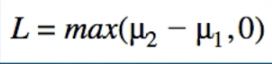

## Loss Threshold

* Next we can calculate the expected value of the loss, under the joint distribution

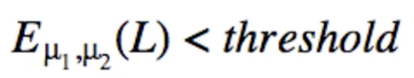

* And we stop when the expected value of this is less than some threshold 
* we can calculate the expected value of the loss under the joint distribution, using this integral: 

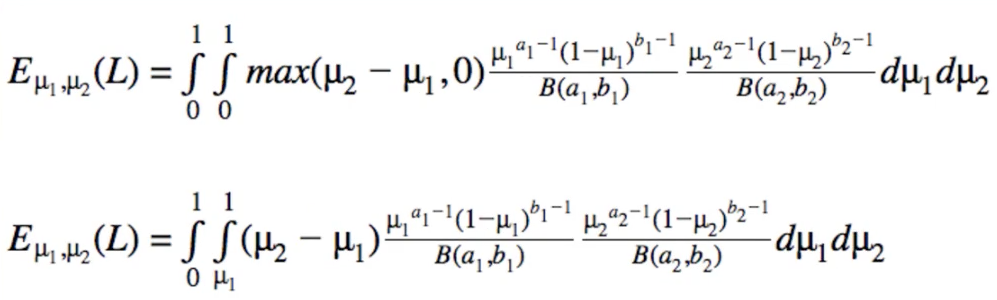

* Can be solved using result of previous integral!

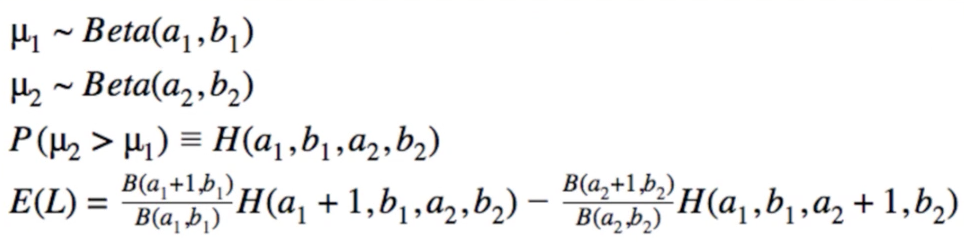

## Thresholds
* So it is possible to define and apply a threshold, we'll next look at how the Bayesian method automatically converges to the maximum CTR
* Note Thompson sampling doesn't stop you from using a traditional A/B test too!